In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler


In [2]:
#Process data
%run data_handler.ipynb

Raw Inputs
: [[0.17152521 0.34391687 0.2487372 ]
 [0.24211446 0.64407427 0.27243281]
 [0.53490572 0.39850092 0.17338873]
 [0.49258141 0.61159319 0.34017639]
 [0.13462167 0.21991724 0.45820622]
 [0.34552327 0.94135983 0.26936348]
 [0.15183663 0.43999062 0.99088187]
 [0.64550284 0.39714294 0.91977134]
 [0.74691195 0.28419631 0.22629985]
 [0.17047699 0.6970324  0.14916943]
 [0.22054934 0.29782524 0.34355534]
 [0.66601366 0.67198515 0.2462953 ]
 [0.04680895 0.23136024 0.77061759]
 [0.60009728 0.72513573 0.06608864]
 [0.96599485 0.86111969 0.56682913]]
Raw Outputs
: [-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758 -0.11062091
 -0.39892551 -0.11386851 -0.13146061 -0.09418956 -0.04694741 -0.10596504
 -0.11804826 -0.03637783 -0.05675837]
    compound-1  compound-2  compound-3  trans-side-effect  source
16    0.303031    0.242424    0.474748          -0.030680  week-2
3     0.492581    0.611593    0.340176          -0.034835    file
13    0.600097    0.725136    0.066089          -0

In [3]:
X = inputs
y = outputs

In [4]:
%run ../common_functions.ipynb
# Initialize result collection
query_results = []

In [5]:

n_features = X.shape[1]
print("Number of features: ", n_features)

# Step 1: Fit GP with fixed kernel for importance estimation
#base_kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
base_kernel = RBF(length_scale=0.1, length_scale_bounds=(1e-6, 1e2))
#base_kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
gp_temp = GaussianProcessRegressor(kernel=base_kernel, alpha=1e-10)
gp_temp.fit(X, y)

# Step 2: Compute permutation importance
result = permutation_importance(gp_temp, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean
print("Permutation importance:", importances)

# Step 3: Convert importance to length scales (inverse relationship)
length_scales = 1.0 / (importances + 1e-6)
print("Adjusted length scales:", length_scales)

# Step 4: Build new kernel with adjusted scales
adjusted_kernel = RBF(length_scale=length_scales)
adjusted_kernel=None

Number of features:  3
Permutation importance: [0.38575777 0.55760188 2.76667335]
Adjusted length scales: [2.59229361 1.79339103 0.36144478]


In [6]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.01, grid_size=100, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.1, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.27465128 0.25022225 0.45463519]


In [7]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.05, grid_size=100, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.05, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.25204147 0.25952975 0.4319121 ]


In [8]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.1, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.25204147 0.25952975 0.4319121 ]


In [9]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=1.0, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 1.0, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.25204147 0.20368475 0.39782746]


In [10]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=2.0, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 2.0, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.25204147 0.15714724 0.37510436]


In [11]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=3.0, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 3.0, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.26334638 0.13853224 0.36374281]


In [12]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.1, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.24073656 0.20368475 0.409189  ]


In [13]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.05, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.05, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.24073656 0.21299225 0.409189  ]


In [14]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.1, apply_scaling=True, kernel=adjusted_kernel)
print("Next query point:", next_point)
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.1, next_point,score)

Number of features:  3
Dimension of input space: 3
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 1000000 points
Known data volume: 0.21167374729707028
Grid volume: 1.1599605081185786
Coverage ratio of known data to grid volume: 0.18248358096294054
Mean  1000000
Std   1000000
Next query point: [0.24073656 0.20368475 0.409189  ]


In [15]:
find_best_candidate(query_results)

Total number of points to evaluate: 9
{'method': 'PI', 'xi': 0.1, 'kappa': None, 'x': array([0.27465128, 0.25022225, 0.45463519]), 'score': 0.6344624385899105, 'dim': 3}
{'method': 'PI', 'xi': 0.05, 'kappa': None, 'x': array([0.25204147, 0.25952975, 0.4319121 ]), 'score': 0.5894367238415966, 'dim': 3}
{'method': 'PI', 'xi': 0.1, 'kappa': None, 'x': array([0.25204147, 0.25952975, 0.4319121 ]), 'score': 0.5393850928908912, 'dim': 3}
{'method': 'UCB', 'xi': None, 'kappa': 1.0, 'x': array([0.25204147, 0.20368475, 0.39782746]), 'score': 1.5079750648171655, 'dim': 3}
{'method': 'UCB', 'xi': None, 'kappa': 2.0, 'x': array([0.25204147, 0.15714724, 0.37510436]), 'score': 2.297525518773277, 'dim': 3}
{'method': 'UCB', 'xi': None, 'kappa': 3.0, 'x': array([0.26334638, 0.13853224, 0.36374281]), 'score': 3.205696566541086, 'dim': 3}
{'method': 'EI', 'xi': 0.1, 'kappa': None, 'x': array([0.24073656, 0.20368475, 0.409189  ]), 'score': 0.1991114318542304, 'dim': 3}
{'method': 'EI', 'xi': 0.05, 'kappa'

{'method': 'UCB',
 'xi': None,
 'kappa': 3.0,
 'x': array([0.26334638, 0.13853224, 0.36374281]),
 'score': 3.205696566541086,
 'dim': 3}

In [16]:
#add points to dataframe
add_points_to_df(df_sorted, query_results)
pd.set_option('display.max_rows', None)
print(df_sorted)

    compound-1  compound-2  compound-3  trans-side-effect  source
16    0.303031    0.242424    0.474748          -0.030680  week-2
3     0.492581    0.611593    0.340176          -0.034835    file
13    0.600097    0.725136    0.066089          -0.036378    file
10    0.220549    0.297825    0.343555          -0.046947    file
4     0.134622    0.219917    0.458206          -0.048008    file
14    0.965995    0.861120    0.566829          -0.056758    file
1     0.242114    0.644074    0.272433          -0.087963    file
9     0.170477    0.697032    0.149169          -0.094190    file
11    0.666014    0.671985    0.246295          -0.105965    file
5     0.345523    0.941360    0.269363          -0.110621    file
15    0.464647    0.666667    0.171718          -0.111186  week-1
2     0.534906    0.398501    0.173389          -0.111415    file
0     0.171525    0.343917    0.248737          -0.112122    file
7     0.645503    0.397143    0.919771          -0.113869    file
12    0.04

/var/folders/d6/s3jc1rb17y1411yjy8r6jlf80000gn/T/ipykernel_25089/923837372.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(other_cols))


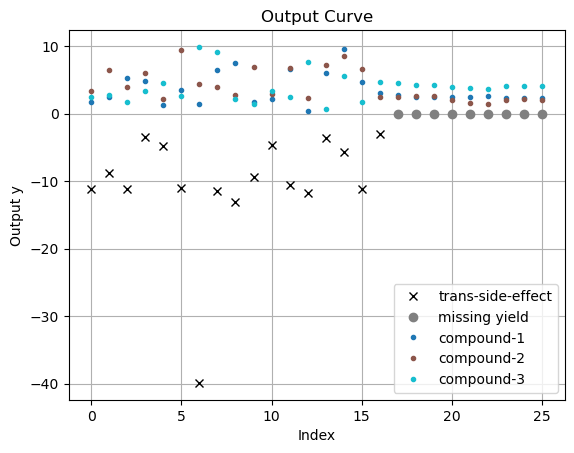

In [18]:
plot_output_points(df_sorted, scale_factor=10.0, yield_scale_factor=100.0)